Basic Question for Titanic Analysis:

    1.) Who were the passengers on the Titanic? (Ages, Gender, Class, ..etc)
    2.) What deck were the passengers on and how does that relate to their class?
    3.) Where did the passengers come from?
    4.) Who was alone and who was with family?
    
Advanced Questions:

    5.) What factors helped someone survive the sinking?

In [130]:
import pandas
import seaborn
import numpy
from pandas import Series, DataFrame
import matplotlib.pyplot as plotter
%matplotlib inline

First Step: Import Data from Titanic.csv

In [131]:
titanic_data = pandas.read_csv("Titanic_Data.csv")

# See the data imported from the csv
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [132]:
# See the respective fields of the Titanic Data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Question 1: Who were the passengers on the Titanic? (Age, Gender, Class ...etc)

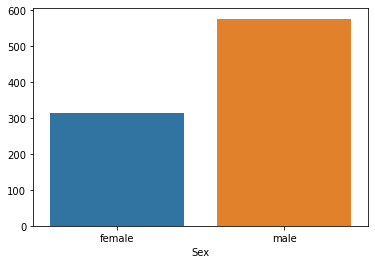

In [133]:
sex_group = titanic_data.groupby("Sex")

seaborn.barplot(sex_group["Sex"].count().index, sex_group["Sex"].count().values)

Based on the data above, we can see that there is a higher proportions of males as compared to females.

Now, let's see what is the age proportion of the passengers:

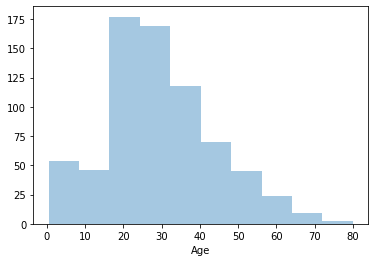

In [134]:
seaborn.distplot(titanic_data["Age"], bins = 10, kde = False)

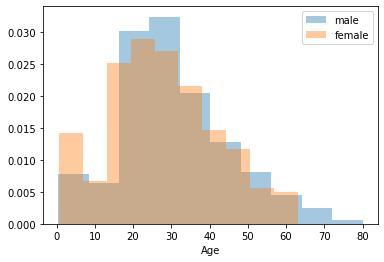

In [135]:
# Let's now get the percentage distribution of the ages for the respective sexes
# Firstly, we get the dataframe by the group and plot the histogram based on the age
seaborn.distplot(sex_group.get_group("male")["Age"], kde = False, norm_hist = True, bins = 10, 
                 hist_kws = {"label":"male"}, )

seaborn.distplot(sex_group.get_group("female")["Age"], kde = False, norm_hist = True, bins = 10, 
                 hist_kws = {"label":"female"})

plotter.legend()

Based on the first diagram, we can see that majority of the passengers were around the age of 20 to 40. 

We then further separate the ages count based on the sexes: male and female

Based on the second diagram above, it shows the percentage of the age count based on the total of the respective sexes count. We can see that the high percentage of male and females respectively is still between 20 to 40 years old. 

However, we also notice that there is a higher percentage of females who are below the age of 10 as compared to males.
Furthermore, there are no females who are above the age of 65.

Now that we have analyzed the age and genger, let us now compare the class rank between the passengers:

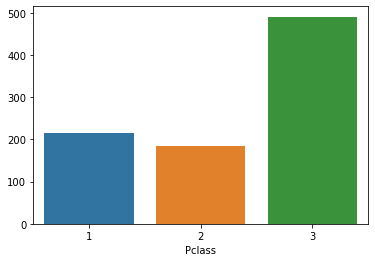

In [136]:
class_group = titanic_data.groupby("Pclass")["Pclass"]

seaborn.barplot(class_group.count().index, class_group.count().values)

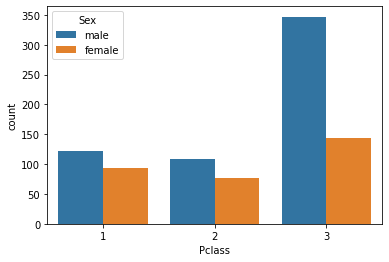

In [137]:
seaborn.countplot("Pclass", data = titanic_data, hue = "Sex")

([<matplotlib.patches.Wedge at 0x20f19a9e608>,
 [Text(0.6483432511872153, 0.8886231083198274, '1'),
  Text(-0.9652070140280552, 0.5276129453217063, '2'),
  Text(0.14266945280190854, -1.0907086811964064, '3')])

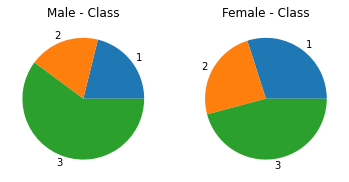

In [138]:
# Group the data based on the Pclass and the sexes
class_group = titanic_data.groupby(["Pclass", "Sex"])["Sex"]

plotter.subplot(1, 2, 1, title = "Male - Class")
plotter.pie(class_group.count()[:, "male"], labels = [1, 2, 3])

plotter.subplot(1, 2, 2, title = "Female - Class")
plotter.pie(class_group.count()[:, "female"], labels = [1, 2, 3])

Based on the first diagram above, we can see that the majority of the passengers were mostly in the class 3 categrory. However, this does not tell us enough information so there is a need to further seperate it into sexes.

What we have noticed from the second diagram is that for the women, the distribution among the 3 classes is fairly equal with the class 3 category just having a slightly higher number of women.

However, the men distribution is more skewed towards the class 3 category as more than 50% of them are in that category. This shows that men are more likely to be in a lower economic class as compared to women.

One thing that we need to note is that: this does not distinguish between a child and an adult. A class is determined by the adult's social class or spending and a child has no control over that. So it is important to also distinguish between a child and adult so that we will have a better idea of the data to analyze.

To do so, we need to create another column "Person" to distinguish whether it is a child or adult. The age limit of a child that we set will be 18 years old.

In [139]:
# Create a function to be passed into the apply function
# If the value is more than 18 or nan, set as the sex. Else, set as the child
def SetPerson(data):
    sex, age = data
    return sex if age > 18 or numpy.isnan(age) else "child"

# Create a new column called Person
titanic_data["Person"] = titanic_data[["Sex", "Age"]].apply(SetPerson, axis = 1)

# Let's see the data with the new column for age less than or equal 18
titanic_data[titanic_data.Age <= 18]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S,child
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q,child
...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,853,0,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,NaN,C,child
853,854,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,PC 17592,39.4000,D28,S,child
855,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S,child
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S,child


So now, let us plot the class distribution in respect to the Person to see what is the new distribution like:

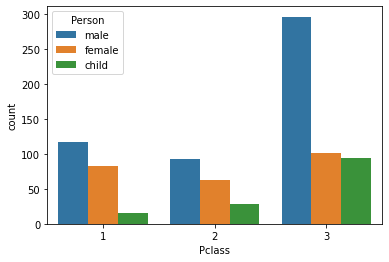

In [140]:
seaborn.countplot("Pclass", data = titanic_data, hue = "Person")

([<matplotlib.patches.Wedge at 0x20f19bf4108>,
 [Text(1.0288565527179336, 0.38917116276693764, '1'),
  Text(0.21002545228467137, 1.0797635432781658, '2'),
  Text(-0.5784535641467086, -0.9356235750161332, '3')])

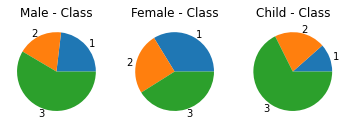

In [141]:
# Group the data based on the Pclass and the sexes
class_group = titanic_data.groupby(["Pclass", "Person"])["Person"]

plotter.subplot(1, 3, 1, title = "Male - Class")
plotter.pie(class_group.count()[:, "male"], labels = [1, 2, 3])

plotter.subplot(1, 3, 2, title = "Female - Class")
plotter.pie(class_group.count()[:, "female"], labels = [1, 2, 3])

plotter.subplot(1, 3, 3, title = "Child - Class")
plotter.pie(class_group.count()[:, "child"], labels = [1, 2, 3])

Based on the new diagrams above, we can see that the distribution of the male and female is still about the same as the previous analysis, where there is a higher proportion of males in class 3 as compared to 1 and 2 while for females, the distribution is relatively similar.

However, what we have noticed in the new diagrams, is that there is an extremely higher proportions of children in category 3 as compared to 1 and 2.

Next, let us see if the age of the passengers can affect the class category:

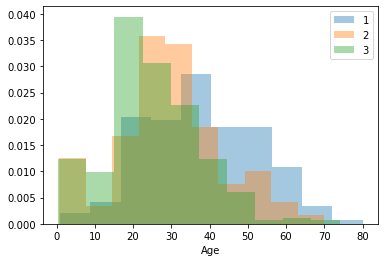

In [142]:
class_group = titanic_data.groupby(["Pclass"])["Age"]

for i in range(1, 4):
    seaborn.distplot(class_group.get_group(i), kde = False, norm_hist = True, bins = 10, 
                     hist_kws = {"label": i})
    
plotter.legend()

For a better view, let us use a kde graph to show the probability:

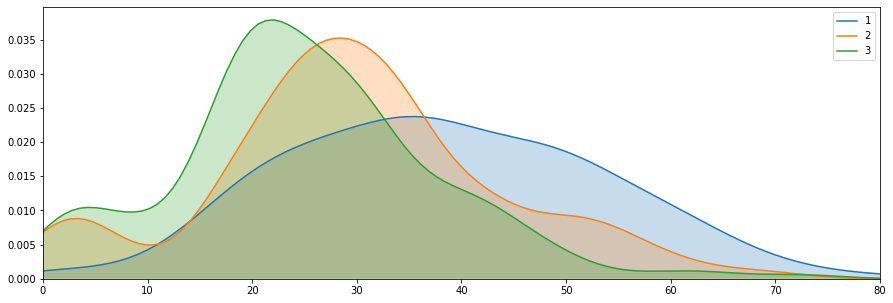

In [143]:
# Helper function to plot Kde graph
def PlotKde(range_val, datagroup, min_val, max_val):
    """
    range_val: List of indexs of the datagroup
    datagroup: The frame data group that is splited based on the range_val given
    min_val: The minimum x-value of the kde plot
    max_val: The maximum x-value of the kde plot
    """
    
    fig, ax = plotter.subplots(figsize = (15, 5))

    for i in range_val:
        seaborn.kdeplot(datagroup.get_group(i), label = i, shade = True)

    plotter.xlim(min_val, max_val)
    plotter.legend()
    # End of Function
    
PlotKde(range(1, 4), class_group, 0, titanic_data["Age"].max())

As we can see from the graph, there are more passengers from the age of 0 up til the 30 who are in the class 2 and 3 category as compared to category 3. However, after the age of 40, the passengers are more likely to be in the class 3 category.

What we can infer from this is that older passengers will more like to be able to afford the more expensive categories and were probably more wealthy as compared to the younger passengers.

This means that as the age increases, the chances of you being in a more socia-economic class increases.

We can also create kde plots for other statistics such as the sex and for more accuracy, the person:

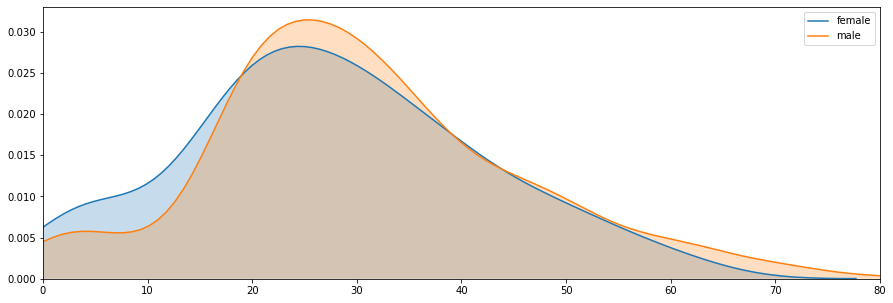

In [144]:
PlotKde(sex_group["Age"].count().index, sex_group["Age"], 0, titanic_data["Age"].max())

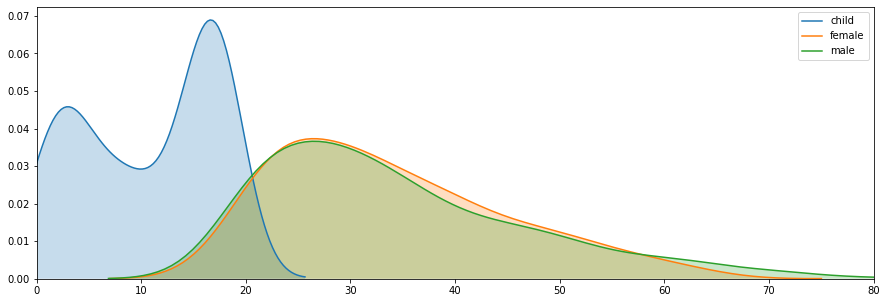

In [145]:
person_group = titanic_data.groupby("Person")["Age"]

PlotKde(person_group.count().index, person_group, 0, titanic_data["Age"].max())

Now that we have understood what the demographic of the passengers consist of for the Titanic, let us move on to the next question.
    
Question 2: What deck were the passengers on and how does that relate to their class?    

So what we notice is that there is no decks field given in the database. However, we realised that the letter at the start of the cabin number actually represents the deck. So in order to figure out the deck, we need to create a new column "Deck" that contains the letter given in the cabin number.

In [146]:
def ParseDeck(cabin):
    # Check if the value is not a NaN which is a float
    return cabin[0] if type(cabin) != float and len(cabin) != 0 else numpy.nan

# Create a new column with the deck
titanic_data["Deck"] = titanic_data["Cabin"].apply(ParseDeck)

titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,NaN


In [147]:
deck_group = titanic_data.groupby("Deck")
deck_group["Deck"].count()

Deck
A    15
B    47
C    59
D    33
E    32
F    13
G     4
T     1
Name: Deck, dtype: int64

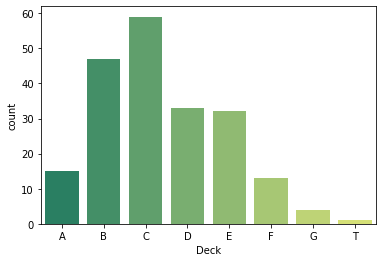

In [148]:
# Create a list of the deck letters to be passed into countplot
deck_list = []

for i in deck_group:
    deck_list.append(i[0])

seaborn.countplot("Deck", data = titanic_data, palette = "summer", order = deck_list)

We noticed that the majority of the passengers were in deck B and C. However, this does not tell us enough information. 

So let's see how does the class of the passengers related to their deck:

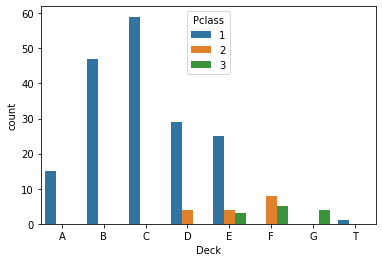

In [149]:
seaborn.countplot("Deck", data = titanic_data, order = deck_list, hue = "Pclass")

Based on the data plotted above, we can see that all the passengers that are of class 1 are in Deck E and above. However, what we realise is that majority of the data is missing for passengers of class 2 and 3.

Let's see what percentage of the data do we have for the 3 classes:

In [150]:
deckclass_group = titanic_data.groupby(["Deck", "Pclass"])
deckclass_series = deckclass_group["Deck"].count()

percentage_series = Series(dtype = float)

# For each class 1, 2, 3
for i in range(1, 4):
    
    # Calculate the percentage of the respective class data with cabin against the entire class value
    series = Series(deckclass_series[:, i].sum() * 100.0 / class_group.get_group(i).count(), index = [i])
    
    percentage_series = percentage_series.append(series)
    
percentage_series.name = "Percentage of Class Data found in Cabin"

percentage_series

1    94.623656
2     9.248555
3     3.380282
Name: Percentage of Class Data found in Cabin, dtype: float64

Hence, we can see that most of the cabin data for passengers of classs 1 are given while class 2 and 3 are missing majority of the data. Based on the social segregation in the past, we can assume that the majority of the passengers of the same class will not mix with others. 

So we can assume that the class 1 passengers will get cabins that are on the higher decks as they are more expensive given the view and distance from the engine. We can assume that the smaller the letter, the higher the decks. This means that the top deck is 'A' whereas the lowest deck would be 'T'.

We can also assume that in a normal ship, the higher the deck, the less capacity there will be on that level due to the increase in room size. Hence, we can say that the higher the social-economic class of the passenger, the more likely their cabin will be on the higher decks.

This means that passengers of class 3 will most like be placed within the lower decks of F and G.

This decking arrangement will have an impact on survival as higher decks will have more time to escape due to the waters first flooding the lower decks.

Now that we have analyzed the distribution of the passengers by deck, let us look at the next question:
    
Question 3: Where did the passengers come from?

Let us looked at the embarked infomation to see how many of the passengers are from which area:

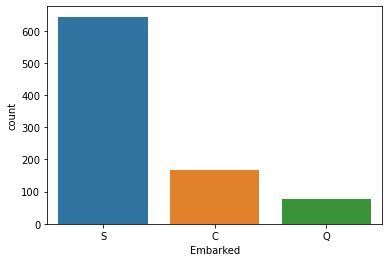

In [151]:
seaborn.countplot("Embarked", data = titanic_data)

We can see that more than half the passengers are from Southampton, with the others from Queenstown and Cherbourg. 

Let us look at the passengers' class from each port to see if there is any relationship between the class and the port embarked from:

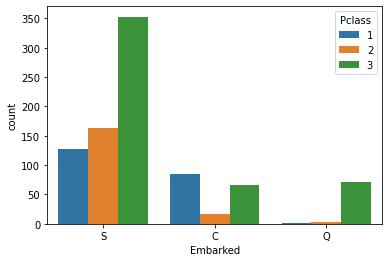

In [152]:
seaborn.countplot("Embarked", data = titanic_data, hue = "Pclass")

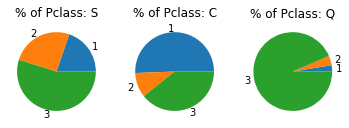

In [153]:
embarked_group = titanic_data.groupby(["Pclass", "Embarked"])

embarkedclass_series = embarked_group["Pclass"].count()

for index, value in enumerate(["S", "C", "Q"]):

    plotter.subplot(1, 3, index + 1)
    plotter.pie(embarkedclass_series[:, value], labels = [1, 2, 3])
    plotter.title("%% of Pclass: %s" % value)

One thing we notice is that for Queenstown, almost all of the passengers are in class 3. This could be due to the economic status of the town during that period.

We also notice that Cherbourg is the only port where the passengers of class 3 are not the majority percentage. Instead, at least half of the passengers there are of class 1. This could mean that Cherbourg is a relatively wealthy port due to the high percentage of passengers being able to afford higher social class.

Let us move on to the next question:

Question 4: Who was alone and who was with family?

To do so, we need to first create a new column "Alone" that tells us whether he is alone or not. A passenger is alone if he does not have any siblings or parents on board with him.

In [154]:
# If the passenger has any siblings or parents, he / she is not alone
def SetAloneStatus(data):
    num_sibling, num_parent = data
    return "Yes" if num_parent + num_sibling == 0 else "No"
    
titanic_data["Alone"] = titanic_data[["SibSp", "Parch"]].apply(SetAloneStatus, axis = 1)

# Let us look at the data with the new column Alone
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Deck,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,NaN,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,C,No
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,NaN,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,C,No
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,NaN,Yes


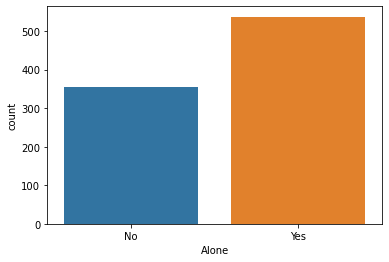

In [155]:
seaborn.countplot("Alone", data = titanic_data)

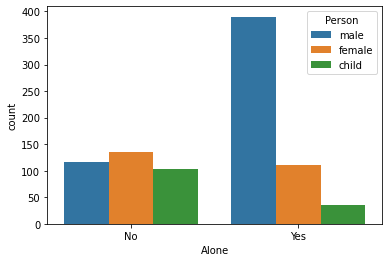

In [156]:
seaborn.countplot("Alone", data = titanic_data, hue = "Person")

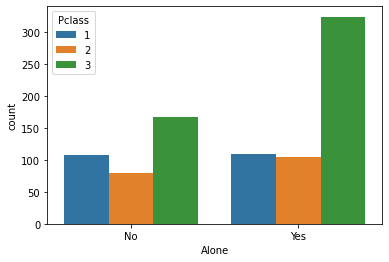

In [157]:
seaborn.countplot("Alone", data = titanic_data, hue = "Pclass")

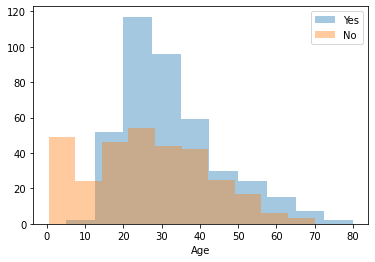

In [158]:
alone_group = titanic_data.groupby(["Alone"])["Age"]

for i in ["Yes", "No"]:
    seaborn.distplot(alone_group.get_group(i), kde = False, bins = 10, hist_kws = {"label": i})
    
plotter.legend()

As seen from the graphs above, the majority of people who are alone are males while the distribution between both women and child are roughly equal. We can also see the same for the class category. For class 1 and 2, the distribution for both is roughly the same while for class 3, we see a slightly larger number for those who are alone.

As in respect to age, we can see that almost all the children are accompanied by someone. We also notice a large number of people who are alone from the age of 20 to 40. 

We can also use a kpe plot to show the probability of being alone in respect to the age.

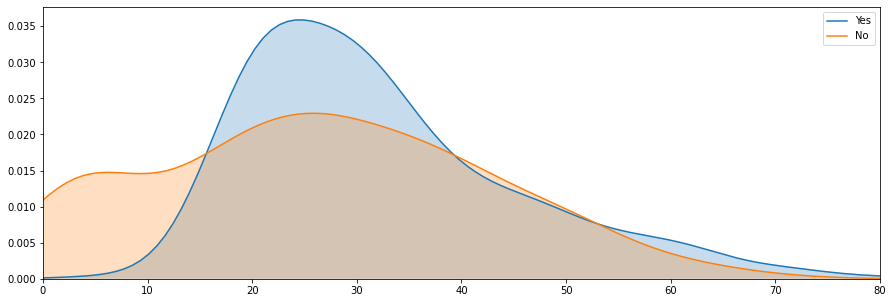

In [159]:
alone_group = titanic_data.groupby(["Alone"])["Age"]

PlotKde(["Yes", "No"], alone_group, 0, titanic_data["Age"].max())

Finally, we have understood the demographic of the passengers aboard the Titanic. Now we need to find out if there is relationship between any of these factors and their survivability rate.

On to the more advanced questions:
Question 5: What factors helped someone survive the sinking?

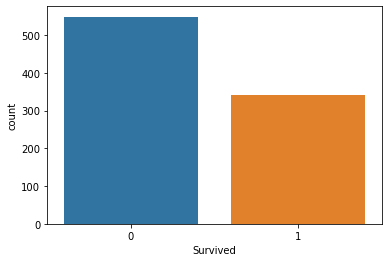

In [160]:
seaborn.countplot("Survived", data = titanic_data)

Firstly, let us see what is the relation between the survival rate and the age:

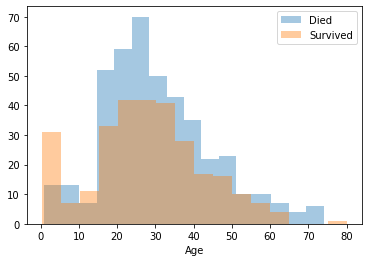

In [161]:
survived_group = titanic_data.groupby("Survived")

seaborn.distplot(survived_group["Age"].get_group(0), kde = False, hist_kws = { "label": "Died" })
seaborn.distplot(survived_group["Age"].get_group(1), kde = False, hist_kws = { "label": "Survived" })

plotter.legend()

Based on the diagram above, we can see that that only before the age of 20 is there a higher number of survivals than deaths.
We can also see that almost all the passengers who are above the age of 60 did not survive. This means that we can infer that the children were heavily prioritized as those that needs to be saved first.

We can also plot a linear regression graph to see the probability of survival based on the age of the passenger.

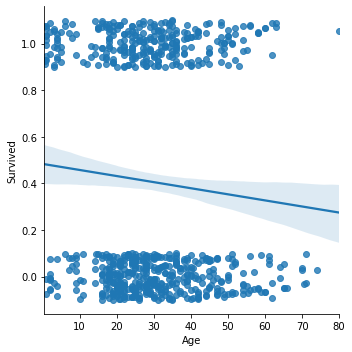

In [162]:
seaborn.lmplot("Age", "Survived", data = titanic_data, y_jitter = 0.1)

Based on the linear regression graph, we can see that the younger the passenger, the higher chance he has of surviving.

Next, let us look if the gender factors into the survival rate as well. We will be looking at child, female and male respectively.

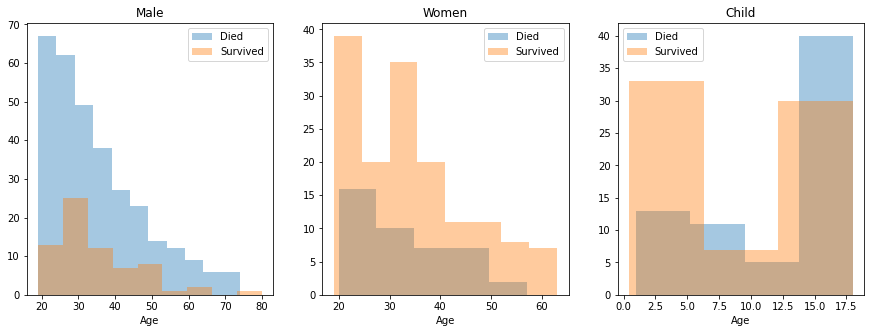

In [172]:
survived_group = titanic_data.groupby(["Survived", "Person"])

# Set the total size of the graphs
plotter.subplots(figsize = (15, 5))

plotter.subplot(1, 3, 1)
seaborn.distplot(survived_group["Age"].get_group((0, "male")), kde = False, hist_kws = { "label": "Died" })
seaborn.distplot(survived_group["Age"].get_group((1, "male")), kde = False, hist_kws = { "label": "Survived" })

plotter.title("Male")
plotter.legend()

plotter.subplot(1, 3, 2)
seaborn.distplot(survived_group["Age"].get_group((0, "female")), kde = False, hist_kws = { "label": "Died" })
seaborn.distplot(survived_group["Age"].get_group((1, "female")), kde = False, hist_kws = { "label": "Survived" })

plotter.title("Women")
plotter.legend()

plotter.subplot(1, 3, 3)
seaborn.distplot(survived_group["Age"].get_group((0, "child")), kde = False, hist_kws = { "label": "Died" })
seaborn.distplot(survived_group["Age"].get_group((1, "child")), kde = False, hist_kws = { "label": "Survived" })

plotter.title("Child")
plotter.legend()

Based on the graph above, we can see that for the male, majority of them did not survive, regardless of age. However, this is the opposite for female as we see a much higher rate of survival for all age range. For the children, we can see that the youngest have the higher chance of survival. However, as the child get older than 13 years old and closer to becoming an adult, the survival rates decreases.

Now, let us plot 2 graphs: 1 graph to see the overall survival rate for each type of Person and 1 to see how it relates to age.

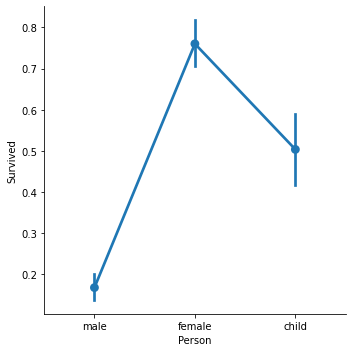

In [164]:
seaborn.catplot("Person", "Survived", data = titanic_data, kind = "point")

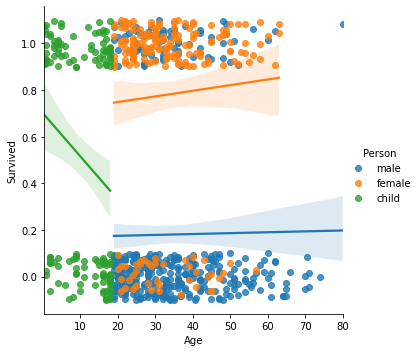

In [171]:
seaborn.lmplot("Age", "Survived", data = titanic_data, hue = "Person", y_jitter = 0.1)

Based on the graph above, we can see that the women have the highest rate of survival followed by the children. The male has the lowest rate of survival at about 20 percent, which is even lower than the lowest point of the children, which is about 35%.

We see an interesting trend for the women where the survival rate increases slightly in respect to their age.
We also obverse that the survival rate of the children decreases as they get older, which support the previous graph.

This proves the famous rule of "Saving Women and Child First".

Hence, we can say that the gender and age of the passengers play a part in their survival rate.

Now, let us look if the class of the passengers plays a factor in their survival rate.

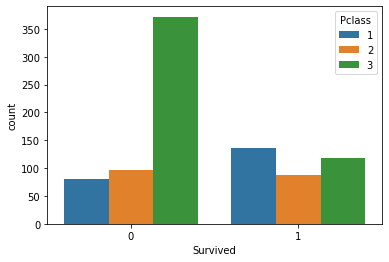

In [207]:
seaborn.countplot("Survived", data = titanic_data, hue = "Pclass")

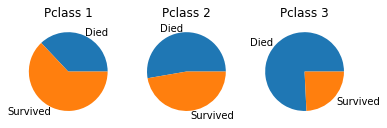

In [205]:
survived_group = titanic_data.groupby(["Pclass", "Survived"])["Survived"]

for i in range(1, 4):
    plotter.subplot(1, 3, i)
    plotter.pie(survived_group.count()[i], labels = ["Died", "Survived"])
    plotter.title("Pclass %d" % i)

Based on the graph above, we can see that the class of the passengers does make a significant impact. As the social-economic class of the passenger increases (means from low to high (3 -> 1)), we can see the percentage of passengers of the class who survive increases. We can also see that the number of passengers from the class 3 who died is higher than the combined number of passengers from class 1 and 2 who survived.

One of the analysis that we done previously is that we found out that higher class passengers mostly stayed on the higher decks. This may have given them an advantage as they had more time before the water reach them. However, due to the data collected for the decks being heavily in the favor of the passengers of class 1 with very little data from class 2 and 3, doing an graph analysis on those data would give us a skewed analysis. Hence, we can only try to infer the possible outcome.

Now, let us plot 2 graphs: 1 graph to see the overall survival rate for each class and 1 to see how it relates to age.

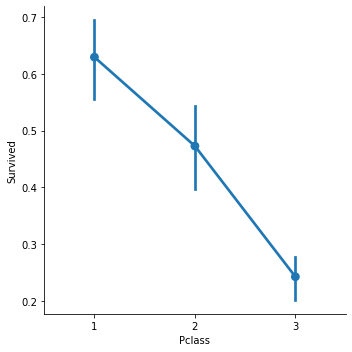

In [208]:
seaborn.catplot("Pclass", "Survived", data = titanic_data, kind = "point")

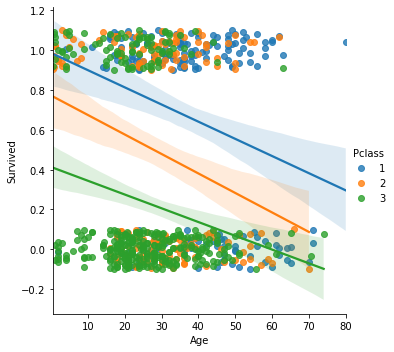

In [210]:
seaborn.lmplot("Age", "Survived", data = titanic_data, hue = "Pclass", y_jitter = 0.1)

Based on the graphs above, we can see that the passengers from class 1 consistantly have the highest rate of survivability compared to the other classes throughout the age range. Another trend that we also notice for all class is that as the age increases, the probability of survival for each class decreases. This means that regardless of class, as your age increases, your chances of survival compared with the younger passengers of the same class is lower.

Now, let us see if the rate of survival in comparism to the class and gender matters.

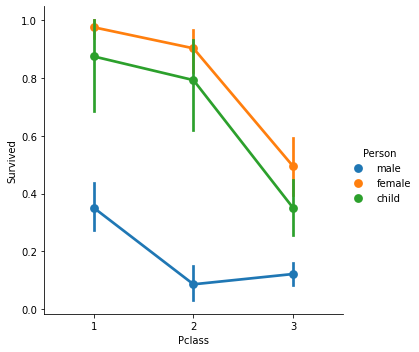

In [211]:
seaborn.catplot("Pclass", "Survived", data = titanic_data, kind = "point", hue = "Person")

On thing we noticed about the graph is that the female and child rate of survival in similar in terms of the graph shape as they decrease at the same rate.

We also notice that regardless of class, the female and child still a much higher rate of survival as compare to the male.

Another trend that we notice is that the drop in survival rate for female and child is drastic from class 2 to 3. This means that despite them having the supposed priority, their class must have played a larger factor where males from class 1 could still have a higher priority over them due to their social status and presumed importance. This is probably why we can see that the survival rate of a female from class 3 is almost the same as a male from class 1.

Hence, we can see the survival rate of a passenger is affected by the class especially if one is from class 1 or 2 but it seems that gender still plays a higher weightage as we can see that the survival rate of a male is still below 50% regardless of class.

Lastly, we would like to see if a person being alone plays a factor in their survival rate.

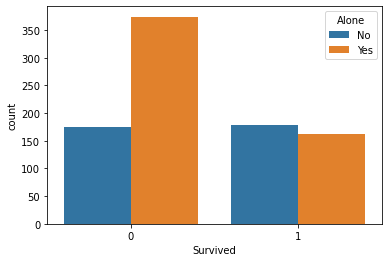

In [212]:
seaborn.countplot("Survived", data = titanic_data, hue = "Alone")

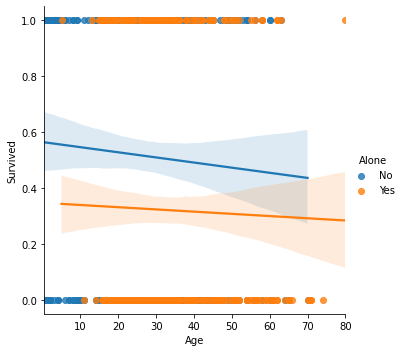

In [214]:
seaborn.lmplot("Age", "Survived", data = titanic_data, hue = "Alone")

Based on the graphs above, for the people who are not alone, the number is roughly the same for survivors and non-survivors. However, for those who were alone, a larger proportion of them did not survived.

This shows that whether a passenger is alone could play a small factor in the rate of survival. As seen from the linear regression, a passenger who is not alone have a slightly higher rate of survival as compared to one who is alone though it is not much. This could be due to there being someone else to alert them or help them if they are in any trouble, which would increase their rate of survival.

This is the end of the analysis for the Titanic passengers.